# **PENGARUH LUAS DAN SPESIFIKASI RUMAH TERHADAP HARGA RUMAH**
**SEBAGAI TUGAS BESAR DATA MINING 2024**

Anggota Kelompok 7 | SI4605:
1. I Putu Bagus Widya WIjaya Pratama | 1202223040
2. Dhimmas Parikesit | 1202223217
3. Fikri Faturrahman Habib | 1202223153


---


# **STUDI KASUS**
**Analisis Harga Rumah dan Pengelompokan Spesifikasi**

Dalam studi ini, penulis ingin memahami bagaimana faktor-faktor seperti luas bangunan, jumlah kamar tidur, dan fasilitas tambahan (seperti koneksi ke jalan utama atau keberadaan basement) memengaruhi harga rumah. Selain itu, penulis juga bertujuan untuk mengelompokkan rumah berdasarkan spesifikasi serupa menggunakan metode clustering.

Tujuan Penelitian
Analisis Korelasi
Mengidentifikasi hubungan antara harga rumah (price) dengan berbagai spesifikasi, seperti:

Luas bangunan (area),
Jumlah kamar tidur (bedrooms),
Fasilitas tambahan (guestroom, basement, airconditioning),
menggunakan model Linear Regression.
Pengelompokan Rumah
Membagi rumah ke dalam cluster berdasarkan spesifikasi seperti luas bangunan, jumlah lantai, dan fasilitas lainnya, untuk memahami pola atau kategori rumah.

Pendekatan
1. Persiapan Data
Dataset mencakup kolom-kolom berikut:

        price: Harga rumah (target prediksi).
        area: Luas bangunan (dalam m²).
        bedrooms: Jumlah kamar tidur.
        bathrooms: Jumlah kamar mandi.
        stories: Jumlah lantai.
        mainroad: Koneksi ke jalan utama (Yes/No).
        guestroom: Keberadaan ruang tamu tambahan (Yes/No).
        basement: Keberadaan basement (Yes/No).
        hotwaterheating: Keberadaan pemanas air (Yes/No).
        airconditioning: Keberadaan AC (Yes/No).

        Data akan dikonversi (misalnya, variabel Yes/No menjadi 1/0), dinormalisasi, dan diperiksa untuk outlier.
        Dan sebelum dibentuk ke dalam sebuah model, data akan diperiksa balancenya terlebih dahulu untuk memastikan kualitas
        model yang dibuat bersifat baik.

2. Analisis Linear Regression
Tujuan: Memprediksi harga rumah berdasarkan fitur seperti area, bedrooms, dan fasilitas lainnya.
Evaluasi model menggunakan metrik MSE dan R².

3. Clustering dengan K-Means
Data seperti area, bedrooms, bathrooms, dan stories akan digunakan untuk membangun model clustering.
Variabel kategorikal seperti mainroad, guestroom, dll., dikodekan menjadi numerik.
Metode Elbow digunakan untuk menentukan jumlah cluster yang optimal.

4. Visualisasi dan Interpretasi
Scatter plot untuk menunjukkan prediksi harga berdasarkan spesifikasi.
Visualisasi hasil clustering dengan warna berbeda untuk setiap cluster.
Manfaat Penelitian
Pemahaman Pasar: Membantu pembeli dan penjual memahami faktor utama yang memengaruhi harga rumah.
Segmentasi Properti: Mengidentifikasi segmen rumah berdasarkan karakteristik spesifikasi untuk strategi pemasaran yang lebih baik.
Keputusan Investasi: Memberikan dasar ilmiah untuk keputusan pembelian atau investasi properti.

5. Deployment
Dan tahap yang terakhir adalah tahap deployment dimana model yang telah dibuat akan dideploy agar dapat digunakan sesuai fungsinya oleh khalayak umum.

--------------------------------
## **1. DATA LOADING & EXPLORATION**
--------------------------------

1. Import library dan mount dataset yang akan digunakan.

In [313]:
import pandas as pd

df = pd.read_csv("./Housing.csv")

2. Menampilkan informasi dari dataset.

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


3. Mendeskripsikan dataset.

In [315]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


--------------------------------
## **2. DATA CLEANING**
--------------------------------

1. Memeriksa jika terdapat data duplikat di dataset.

In [316]:
df.duplicated().sum()

0

2. Memerika apakah terdapat data null di dalam dataset.

In [317]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

3. Menghapus kolom yang tidak digunakan, yakni kolom prefarea dan furnishingstatus.

In [318]:
df = df.drop(columns=['prefarea', 'furnishingstatus'])

4. Memeriksa apakah terdapat outlier pada dataset.

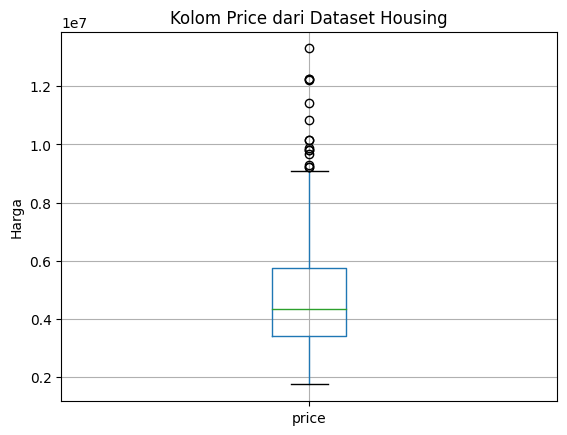

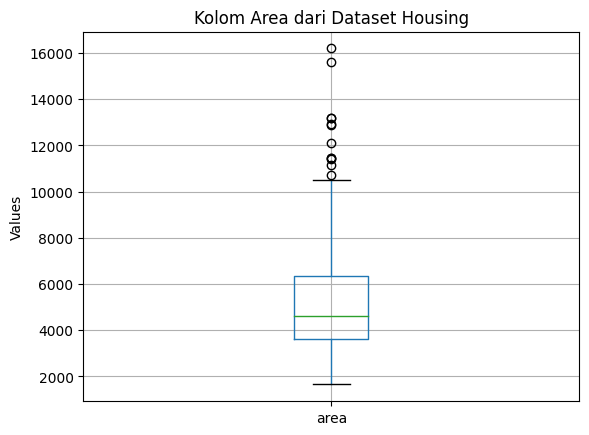

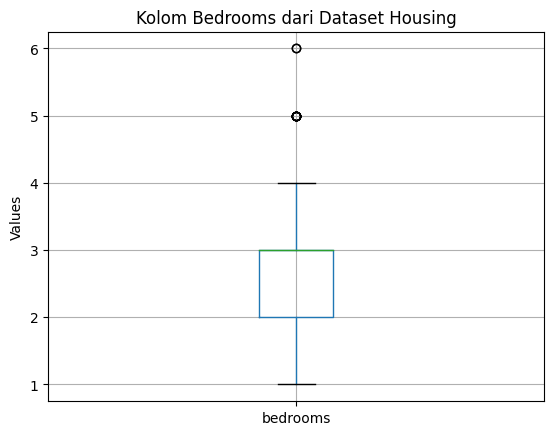

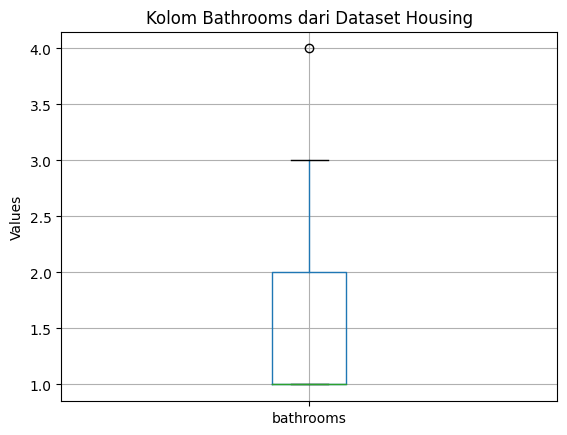

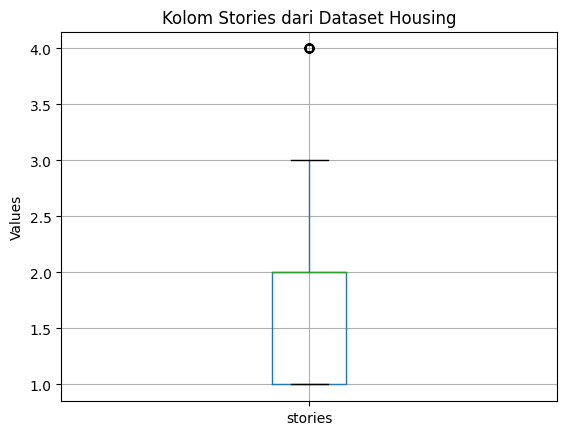

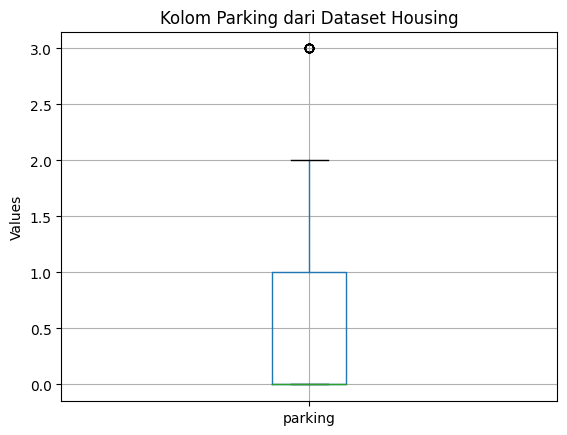

In [319]:
import matplotlib.pyplot as plt

# Kolom Harga
df.boxplot('price')
plt.title('Kolom Price dari Dataset Housing')
plt.ylabel("Harga")
plt.show('Values')

# Kolom Area
df.boxplot('area')
plt.title('Kolom Area dari Dataset Housing')
plt.ylabel("Values")
plt.show()

# Kolom Bedroom
df.boxplot('bedrooms')
plt.title('Kolom Bedrooms dari Dataset Housing')
plt.ylabel("Values")
plt.show()

# Kolom Bathrooms
df.boxplot('bathrooms')
plt.title('Kolom Bathrooms dari Dataset Housing')
plt.ylabel("Values")
plt.show()

# Kolom Stories
df.boxplot('stories')
plt.title('Kolom Stories dari Dataset Housing')
plt.ylabel("Values")
plt.show()

# Kolom Parking
df.boxplot('parking')
plt.title('Kolom Parking dari Dataset Housing')
plt.ylabel("Values")
plt.show()

5. Dikarenakan terdapat outlier pada dataset, harus dilakukan data cleaning dengan cara Drop data outlier agar kualitas model yang diciptakan baik.

In [320]:
# Kolom yang akan diperiksa untuk outlier
outlier = ['price', 'area']
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df[outlier].quantile(0.25)
Q3 = df[outlier].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 0.9 * IQR
upper_bound = Q3 + 0.9 * IQR

# Memfilter data untuk menghapus outlier
df_cleaned = df[~((df[outlier] < lower_bound) | (df[outlier] > upper_bound)).any(axis=1)]

6. Menampilkan data setelah drop data outlier dilakukan.

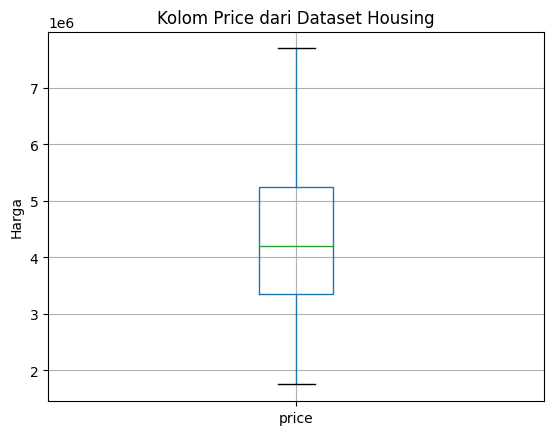

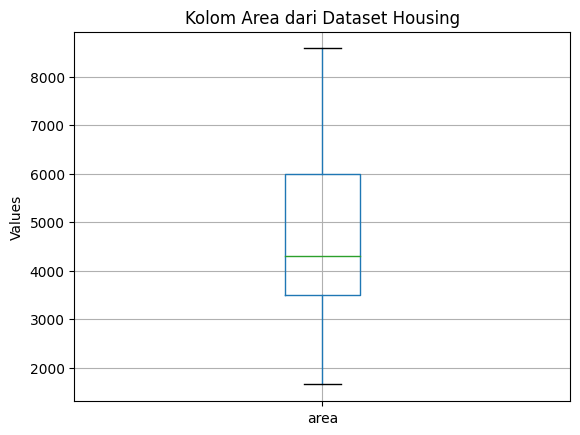

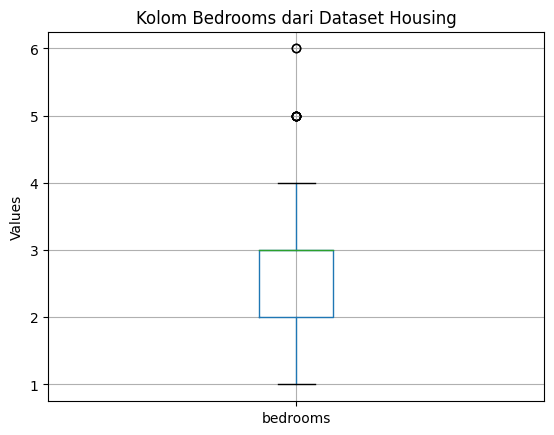

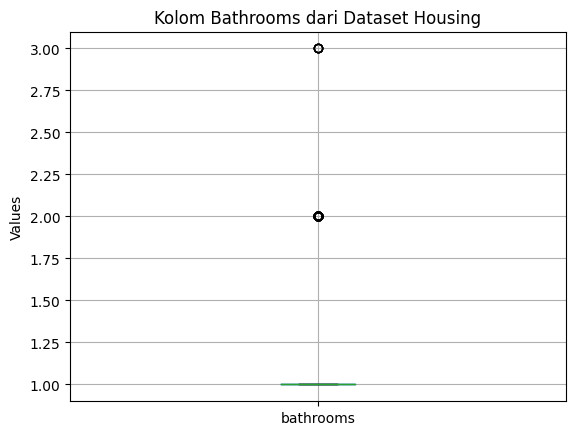

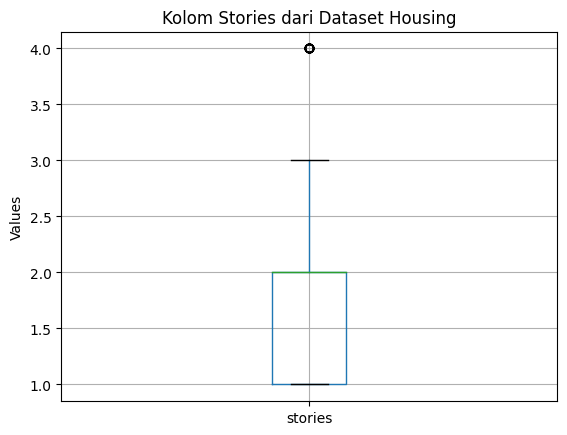

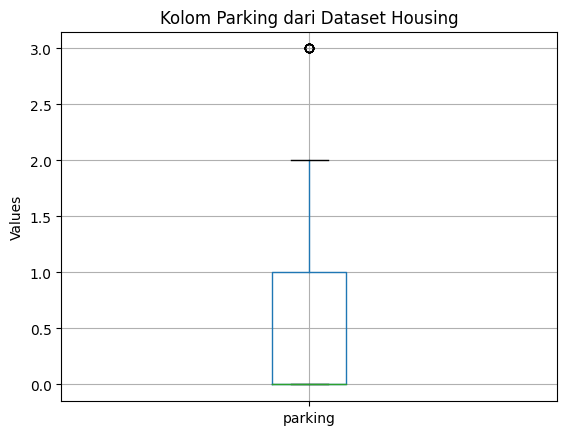

In [321]:
# Kolom Harga
df_cleaned.boxplot('price')
plt.title('Kolom Price dari Dataset Housing')
plt.ylabel("Harga")
plt.show('Values')

# Kolom Area
df_cleaned.boxplot('area')
plt.title('Kolom Area dari Dataset Housing')
plt.ylabel("Values")
plt.show()

# Kolom Bedroom
df_cleaned.boxplot('bedrooms')
plt.title('Kolom Bedrooms dari Dataset Housing')
plt.ylabel("Values")
plt.show()

# Kolom Bathrooms
df_cleaned.boxplot('bathrooms')
plt.title('Kolom Bathrooms dari Dataset Housing')
plt.ylabel("Values")
plt.show()

# Kolom Stories
df_cleaned.boxplot('stories')
plt.title('Kolom Stories dari Dataset Housing')
plt.ylabel("Values")
plt.show()

# Kolom Parking
df_cleaned.boxplot('parking')
plt.title('Kolom Parking dari Dataset Housing')
plt.ylabel("Values")
plt.show()

7. Memeriksa jumlah baris dari kolom setelah pembersihan data outlier.

In [322]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, 42 to 544
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            476 non-null    int64 
 1   area             476 non-null    int64 
 2   bedrooms         476 non-null    int64 
 3   bathrooms        476 non-null    int64 
 4   stories          476 non-null    int64 
 5   mainroad         476 non-null    object
 6   guestroom        476 non-null    object
 7   basement         476 non-null    object
 8   hotwaterheating  476 non-null    object
 9   airconditioning  476 non-null    object
 10  parking          476 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 44.6+ KB


--------------------------------
## **3. DATA TRANSFORMATION & BALANCING**
--------------------------------

1. Dikarenakan terdapat beberapa kolom yang berbentuk kategorikal, diperlukan transformasi agar data yang digunakan untuk pembuatan model berbentuk numerik sehingga dapat dipahami oleh model.

In [323]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].str.strip().str.lower().map({'yes': 1, 'no': 0})
    df_transformed = df_cleaned

print ("Informasi terkait statistik data yang sudah ditransformasi: ")
df_transformed.describe()

Informasi terkait statistik data yang sudah ditransformasi: 


C:\Users\dimas\AppData\Local\Temp\ipykernel_17284\3801123806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].str.strip().str.lower().map({'yes': 1, 'no': 0})
C:\Users\dimas\AppData\Local\Temp\ipykernel_17284\3801123806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].str.strip().str.lower().map({'yes': 1, 'no': 0})
C:\Users\dimas\AppData\Local\Temp\ipykernel_17284\3801123806.py:4: SettingWithCopyWarning: 
A value is trying to be set 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
count,4.760000e+02,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,4.329412e+06,4652.367647,2.915966,1.233193,1.756303,0.838235,0.165966,0.338235,0.039916,0.279412,0.590336
std,1.338721e+06,1570.396051,0.729295,0.447485,0.830638,0.368622,0.372442,0.473607,0.195968,0.449182,0.824769
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.360000e+06,3495.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.196500e+06,4310.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.244750e+06,6000.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,7.700000e+06,8580.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


2. Scaling kolom price.

In [324]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_transformed[['price']])

df_scaled = pd.DataFrame(scaled, columns=['price'], index=df_transformed.index)

3. Menyimpan data yang sudah discaled ke dalam data frame baru.

In [325]:
df_transformed_scaled = df_transformed.copy()

df_transformed_scaled['price'] = df_scaled

df_transformed_scaled.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,0.433515,4652.367647,2.915966,1.233193,1.756303,0.838235,0.165966,0.338235,0.039916,0.279412,0.590336
std,0.224995,1570.396051,0.729295,0.447485,0.830638,0.368622,0.372442,0.473607,0.195968,0.449182,0.824769
min,0.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270588,3495.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.411176,4310.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.587353,6000.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,8580.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


4. Memeriksa keseimbangan data.

In [326]:
print(df_transformed_scaled['price'].value_counts())
print('\n')
print(df_transformed_scaled['area'].value_counts())
print('\n')
print(df_transformed_scaled['bedrooms'].value_counts())
print('\n')
print(df_transformed_scaled['bathrooms'].value_counts())
print('\n')
print(df_transformed_scaled['stories'].value_counts())
print('\n')
print(df_transformed_scaled['mainroad'].value_counts())
print('\n')
print(df_transformed_scaled['guestroom'].value_counts())
print('\n')
print(df_transformed_scaled['basement'].value_counts())
print('\n')
print(df_transformed_scaled['hotwaterheating'].value_counts())
print('\n')
print(df_transformed_scaled['airconditioning'].value_counts())
print('\n')
print(df_transformed_scaled['parking'].value_counts())

price
0.411765    17
0.294118    15
0.529412    11
0.317647     9
0.270588     8
            ..
0.584706     1
0.523529     1
0.335294     1
0.617647     1
0.587059     1
Name: count, Length: 182, dtype: int64


area
6000    19
3000    14
4500    13
4000    11
5500     8
        ..
4950     1
3900     1
1905     1
4075     1
3620     1
Name: count, Length: 246, dtype: int64


bedrooms
3    263
2    129
4     73
5      7
6      2
1      2
Name: count, dtype: int64


bathrooms
1    370
2    101
3      5
Name: count, dtype: int64


stories
1    208
2    204
3     36
4     28
Name: count, dtype: int64


mainroad
1    399
0     77
Name: count, dtype: int64


guestroom
0    397
1     79
Name: count, dtype: int64


basement
0    315
1    161
Name: count, dtype: int64


hotwaterheating
0    457
1     19
Name: count, dtype: int64


airconditioning
0    343
1    133
Name: count, dtype: int64


parking
0    290
1    100
2     77
3      9
Name: count, dtype: int64


5. Melakukan Data Balancing pada kolom bedrooms, bathrooms, stories.

In [327]:
from imblearn.over_sampling import SMOTE

6. Memisahkan fitur x dan y

In [328]:
# Memisahkan mayoritas dan minoritas berdasarkan jumlah 'bedrooms'
mayoritas_bedrooms = df_transformed_scaled[df_transformed_scaled['bedrooms'] == 3]
minoritas_bedrooms = df_transformed_scaled[df_transformed_scaled['bedrooms'].isin([1, 2, 4, 5, 6])]

# Memisahkan mayoritas dan minoritas berdasarkan jumlah 'stories'
mayoritas_stories = df_transformed_scaled[df_transformed_scaled['stories'].isin([1, 2])]
minoritas_stories = df_transformed_scaled[df_transformed_scaled['stories'].isin([3, 4])]

# Memisahkan mayoritas dan minoritas berdasarkan jumlah 'bathrooms'
mayoritas_bathrooms = df_transformed_scaled[df_transformed_scaled['bathrooms'] == 1]
minoritas_bathrooms = df_transformed_scaled[df_transformed_scaled['bathrooms'].isin([2, 3])]

# Memisahkan mayoritas dan minoritas berdasarkan 'airconditioning'
mayoritas_airconditioning = df_transformed_scaled[df_transformed_scaled['airconditioning'] == 1]
minoritas_airconditioning = df_transformed_scaled[df_transformed_scaled['airconditioning'] == 0]

7. Inisiasi Oversampler

In [329]:
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)

8. Menerapkan oversampling

In [330]:
def perform_smote(x, y):
    if len(y.unique()) > 1:
        x_resampled, y_resampled = smote.fit_resample(x, y)
        return pd.concat([x_resampled, y_resampled], axis=1)
    else:
        return pd.concat([x, y], axis=1)

variables = [
    'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking'
]

df_oversampled_list = []

for var in variables:
    counts = df_transformed_scaled[var].value_counts()
    majority_class = counts.idxmax()
    minor_classes = counts[counts < counts[majority_class]].index

    mayoritas = df_transformed_scaled[df_transformed_scaled[var] == majority_class]
    minoritas = df_transformed_scaled[df_transformed_scaled[var].isin(minor_classes)]

    # Fitur dan target untuk SMOTE
    x_minoritas = minoritas.drop(columns=[var])
    y_minoritas = minoritas[var]

    if not minoritas.empty:
        minoritas_resampled = perform_smote(x_minoritas, y_minoritas)
        df_resampled = pd.concat([mayoritas, minoritas_resampled], axis=0)
    else:
        df_resampled = mayoritas

    df_oversampled_list.append(df_resampled)

df_oversampled = pd.concat(df_oversampled_list, axis=0).drop_duplicates()

df_final = df_oversampled[df_transformed_scaled.columns]

print("Distribusi akhir setelah oversampling:")
for var in variables:
    print(f"{var}:\n{df_final[var].value_counts()}\n")

print("Shape akhir data:", df_final.shape)


Distribusi akhir setelah oversampling:
bedrooms:
bedrooms
3    715
4    184
2    176
5    129
6    129
1    129
Name: count, dtype: int64

bathrooms:
bathrooms
1    1086
2     275
3     101
Name: count, dtype: int64

stories:
stories
2    544
1    490
4    214
3    214
Name: count, dtype: int64

mainroad:
mainroad
1    1067
0     395
Name: count, dtype: int64

guestroom:
guestroom
0    1363
1      99
Name: count, dtype: int64

basement:
basement
0    1222
1     240
Name: count, dtype: int64

hotwaterheating:
hotwaterheating
0    1443
1      19
Name: count, dtype: int64

airconditioning:
airconditioning
0    1178
1     284
Name: count, dtype: int64

parking:
parking
0    970
1    243
2    149
3    100
Name: count, dtype: int64

Shape akhir data: (1462, 11)


9. Menggabungkan kembali data yang sudah dioversampling.

In [331]:
print(df_final['price'].value_counts())
print('\n')
print(df_final['area'].value_counts())
print('\n')
print(df_final['bedrooms'].value_counts())
print('\n')
print(df_final['bathrooms'].value_counts())
print('\n')
print(df_final['stories'].value_counts())
print('\n')
print(df_final['mainroad'].value_counts())
print('\n')
print(df_final['guestroom'].value_counts())
print('\n')
print(df_final['basement'].value_counts())
print('\n')
print(df_final['hotwaterheating'].value_counts())
print('\n')
print(df_final['airconditioning'].value_counts())
print('\n')
print(df_final['parking'].value_counts())

price
0.411765    17
0.294118    15
0.529412    11
0.317647     9
0.200000     8
            ..
0.375039     1
0.460727     1
0.489478     1
0.348604     1
0.860518     1
Name: count, Length: 1168, dtype: int64


area
6000    99
6600    21
6360    19
3000    18
2145    18
        ..
5333     1
1944     1
2320     1
5118     1
6563     1
Name: count, Length: 918, dtype: int64


bedrooms
3    715
4    184
2    176
5    129
6    129
1    129
Name: count, dtype: int64


bathrooms
1    1086
2     275
3     101
Name: count, dtype: int64


stories
2    544
1    490
4    214
3    214
Name: count, dtype: int64


mainroad
1    1067
0     395
Name: count, dtype: int64


guestroom
0    1363
1      99
Name: count, dtype: int64


basement
0    1222
1     240
Name: count, dtype: int64


hotwaterheating
0    1443
1      19
Name: count, dtype: int64


airconditioning
0    1178
1     284
Name: count, dtype: int64


parking
0    970
1    243
2    149
3    100
Name: count, dtype: int64


9. Memeriksa korelasi antar variabel.

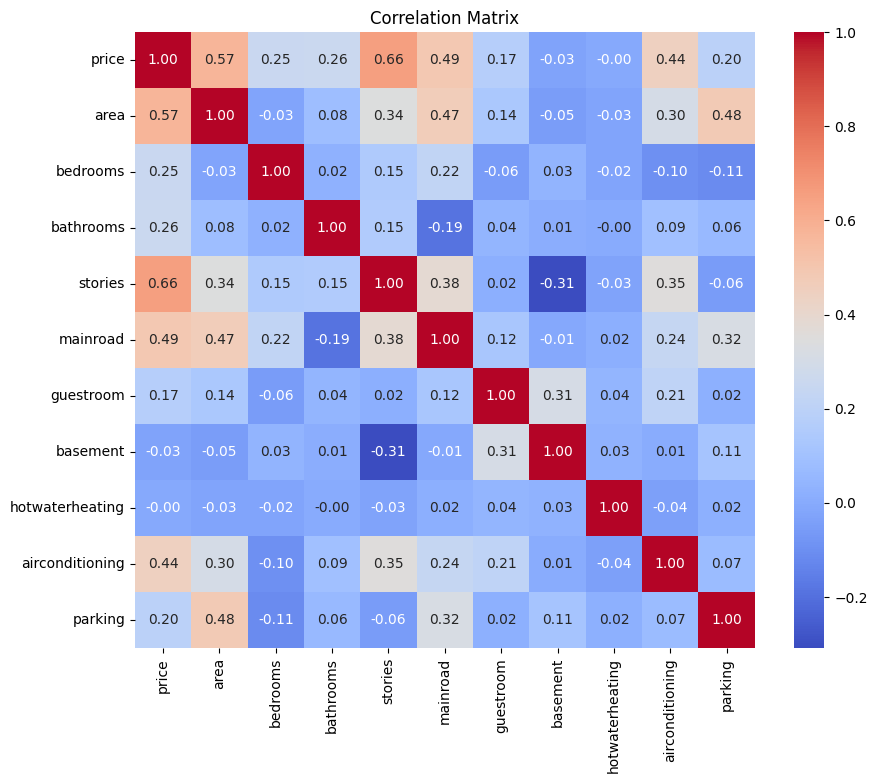

In [332]:
import seaborn as sns

correlation_matrix = df_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

10. Menentukan data yang akan digunakan berdasarkan korelasi.

In [333]:
df_pretuned = df_final[['price', 'area', 'stories', 'mainroad' ,'airconditioning']]

--------------------------------
## **4. MODELLING [Linear Regression]**
--------------------------------

Sebelum melakukan pembuatan model, dataset harus diberikan pelabelan untuk memilih fitur yang dijadikan target dan memisahkan data yang digunakan untuk pelatihan dan pengujian.

1. Membuat Labelling Data.

In [334]:
# Membuat variable untuk pembuatan labelling regresi linear
data_linear_regression = df_pretuned

x = data_linear_regression.drop('price', axis=1)
y = data_linear_regression['price']

2. Import Library untuk split dataset dan split data set.

In [335]:
from sklearn.model_selection import train_test_split

3. Split dataset untuk training dan testing, dimana data dibagi sebanyak 80% (380 Baris) untuk training dan 20% (96 Baris) untuk testing.

In [336]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [337]:
x_train

,area,stories,mainroad,airconditioning
330,6500,3,1,1
375,3000,2,1,0
536,3914,2,1,0
117,3600,1,1,0
40,7600,2,1,1
...,...,...,...,...
394,4079,3,1,0
558,6505,4,1,0
597,4098,2,1,0
297,7259,1,1,0


In [338]:
y_test

629    0.686483
370    0.974949
150    0.258824
259    0.176304
300    0.739312
         ...   
200    0.545526
539    0.437880
388    0.251870
459    0.770608
522    0.105882
Name: price, Length: 293, dtype: float64

4. Membuat dan melatih model Regresi linear.

In [339]:
from sklearn.linear_model import LinearRegression

model_linear_regression = LinearRegression()
model_linear_regression.fit(x_train, y_train)

LinearRegression()

5. Membuat prediksi dari model yang sudah dilatih (x_train dan x_test)

In [340]:
x_trn_pred_LR_bfr= model_linear_regression.predict(x_train)
x_tst_pred_LR_bfr= model_linear_regression.predict(x_test)

6. Import library untuk proses evaluasi model yang telah dibuat.

In [341]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np

7. Mencari Intercept dan Koefisien dari model.

In [342]:
intercept = model_linear_regression.intercept_
koefisien = model_linear_regression.coef_

print("Intercept:", '\n', intercept)
print("Koefisien:",'\n', koefisien)

Intercept: 
 -0.003404104257570928
Koefisien: 
 [4.47992040e-05 1.00495412e-01 7.05090320e-02 9.38962113e-02]


8. Mencari p-value dari model.

In [343]:
x_train_const = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train_const)
hasil_regresi_linear = ols_model.fit()

9. Menampilkan p-value dari variable prediktor.

In [344]:
p_values = hasil_regresi_linear.pvalues
print("Hasil P-Value: ")
print(p_values)

Hasil P-Value: 
const              8.175439e-01
area               4.180743e-42
stories            1.352644e-82
mainroad           1.644677e-09
airconditioning    7.318589e-15
dtype: float64


10. Menampilkan rata-rata kuadrat kesalahan antara nilai prediksi dan nilai aktual.

In [345]:
mse_lr = mean_squared_error(y_test, x_tst_pred_LR_bfr)
r2_lr = r2_score(y_test, x_tst_pred_LR_bfr)

print("Hasil Proporsi Varians Sebelum Tuning: ")
print(mse_lr)

print("Hasil Akurasi Model Sebelum Tuning: ")
print(r2_lr)

Hasil Proporsi Varians Sebelum Tuning: 
0.020370919783546486
Hasil Akurasi Model Sebelum Tuning: 
0.6128833551144711


--------------------------------
## **3. MODEL TUNING [Linear Regression]**
--------------------------------

1. Model Tuning menggunakan GridSearchCV

In [346]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

2. Menentukan parameter yang akan dicoba.

In [347]:
param_grid_lr = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [-1, 1, 2],
    'positive': [True, False]
}

3. Inisiasi kembali mode regresi linear dan GridSearchCV.

In [348]:
grid_search_lr = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid_lr,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

4. Fit model dengan data training.

In [349]:
grid_search_lr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, 1, 2],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [350]:
x_train

,area,stories,mainroad,airconditioning
330,6500,3,1,1
375,3000,2,1,0
536,3914,2,1,0
117,3600,1,1,0
40,7600,2,1,1
...,...,...,...,...
394,4079,3,1,0
558,6505,4,1,0
597,4098,2,1,0
297,7259,1,1,0


In [351]:
y_train

330    0.767663
375    0.079760
536    0.489232
117    0.323529
40     0.552941
         ...   
394    0.424450
558    0.832850
597    0.603327
297    0.371341
390    0.728575
Name: price, Length: 1169, dtype: float64

5. Evaluasi model setelah tuning.

In [352]:
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_lr, best_score_lr

({'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False},
 -0.022193031827821463)

6. Mendapatkan model terbaik.

In [353]:
best_model_lr = grid_search_lr.best_estimator_

evaluasi_model_regresi_linear_after = best_model_lr.predict(x_test)

In [354]:
x_train

,area,stories,mainroad,airconditioning
330,6500,3,1,1
375,3000,2,1,0
536,3914,2,1,0
117,3600,1,1,0
40,7600,2,1,1
...,...,...,...,...
394,4079,3,1,0
558,6505,4,1,0
597,4098,2,1,0
297,7259,1,1,0


In [355]:
y_test

629    0.686483
370    0.974949
150    0.258824
259    0.176304
300    0.739312
         ...   
200    0.545526
539    0.437880
388    0.251870
459    0.770608
522    0.105882
Name: price, Length: 293, dtype: float64

7. Memeriksa hasil tuning.

In [356]:
mse_lr = mean_squared_error(y_test, evaluasi_model_regresi_linear_after)
r2_lr = r2_score(y_test, evaluasi_model_regresi_linear_after)

print("Hasil Proporsi Varians Setelah Tuning: ")
print(mse_lr)

print("Hasil Akurasi Model Setelah Tuning: ")
print(r2_lr)

Hasil Proporsi Varians Setelah Tuning: 
0.020378755541435367
Hasil Akurasi Model Setelah Tuning: 
0.6127344491084434


--------------------------------
## **5. MODELLING (K-Means Clustering)**
--------------------------------

Mengimport Library K Means dan Matplotlib

In [357]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [358]:
df_clustering = df_pretuned[['price','area']]

df_clustering.head()

,price,area
42,1.000000,6480
45,0.976471,6000
46,0.970588,6000
47,0.964706,6600
48,0.958824,4300


In [359]:
df_clustering.describe()

,price,area
count,1462.000000,1462.000000
mean,0.492669,4792.139535
std,0.234380,1611.869017
min,0.000000,1650.000000
25%,0.308554,3600.500000
50%,0.477807,4319.500000
75%,0.674843,6000.000000
max,1.000000,8580.000000


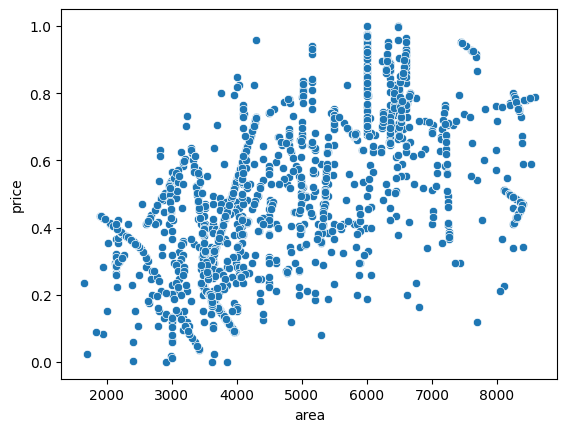

In [360]:
import seaborn as sns
sns.scatterplot(x='area', y='price', data=df_clustering)
plt.show()

In [361]:
inertia = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

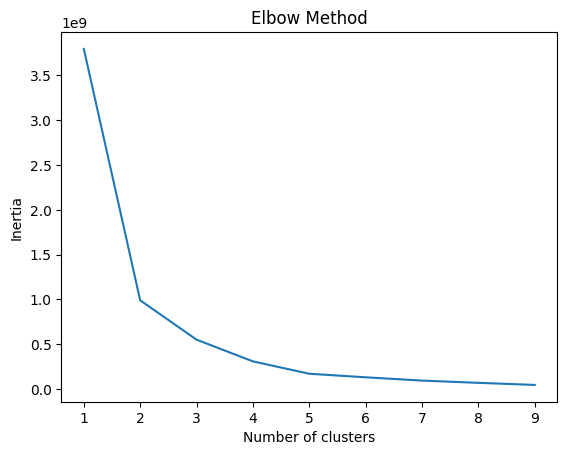

In [362]:
    plt.plot(range(1, 10), inertia)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

In [363]:
model = KMeans(n_clusters=7,random_state=42)
model.fit(x)

KMeans(n_clusters=7, random_state=42)

In [364]:
df_clustering['cluster'] = model.labels_
df_clustering

C:\Users\dimas\AppData\Local\Temp\ipykernel_17284\490300016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['cluster'] = model.labels_


,price,area,cluster
42,1.000000,6480,4
45,0.976471,6000,4
46,0.970588,6000,4
47,0.964706,6600,4
48,0.958824,4300,5
...,...,...,...
295,0.454650,6014,4
296,0.327349,4829,5
297,0.371341,7259,1
298,0.559869,7230,1


In [365]:
from sklearn.metrics import silhouette_score
import seaborn as sns

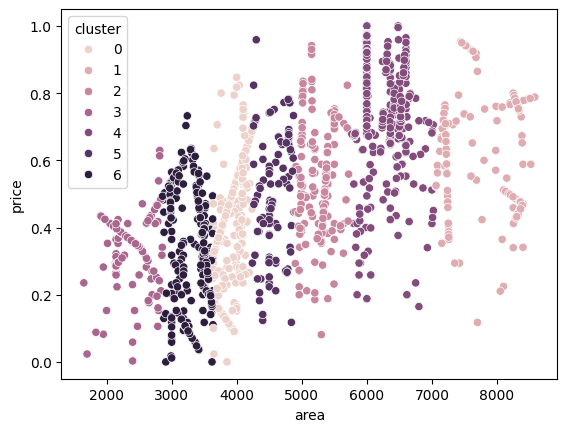

In [366]:
sns.scatterplot(x='area', y='price', data=df_clustering, hue='cluster')
plt.show()

In [367]:
print('Silhouette Score : ')
print(silhouette_score(x, model.labels_))

Silhouette Score : 
0.5486710124829172


In [368]:
from sklearn.model_selection import GridSearchCV

In [369]:
param_grid = {
    'n_clusters' : range(4, 16),
    'init' : ['k-means++', 'random'],
    'n_init' : [10, 20, 30],
    'max_iter' : [100, 200, 300, 400, 500]
}

In [370]:
model = KMeans()
grid = GridSearchCV(model, param_grid)

In [371]:
grid.fit(x)

GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500],
                         'n_clusters': range(4, 16), 'n_init': [10, 20, 30]})

In [372]:
best_score = -1
best_params = None

In [373]:
for params in grid.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(x)
    score = silhouette_score(x, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

In [374]:
print(best_score, best_params)
print("Silhouette Score terbaik setelah tuning:", best_score)

0.6325030528175134 {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 10, 'n_init': 20}
Silhouette Score terbaik setelah tuning: 0.6325030528175134


--------------------------------
## **5. Implementation & Deployment [Linear Regression & K-Means Clustering]**
--------------------------------

### Membuat Linear Regression Model serta mengexport model

In [388]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
import pickle

Menyimpan model Linear Regression

In [389]:
# Save the Linear Regression model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(best_model_lr, f)

Mengecek variabel apa yang mau dicluster

In [390]:
df_clustering = df_clustering[['price','area']]
df_clustering

,price,area
42,1.000000,6480
45,0.976471,6000
46,0.970588,6000
47,0.964706,6600
48,0.958824,4300
...,...,...
295,0.454650,6014
296,0.327349,4829
297,0.371341,7259
298,0.559869,7230


In [391]:
kmeans = KMeans(**best_params)
kmeans.fit(df_clustering)

KMeans(max_iter=200, n_clusters=10, n_init=20)

Menyimpan model K-Means

In [392]:
# Save the K-Means model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### Deployment

Install Streamlit

In [380]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Install Ngrok

In [381]:
%pip install pyngrok

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Konfigurasi Token

In [382]:
!ngrok config add-authtoken 2pbBHEUzI6rrjuMNYdNvOBFJzp3_4xGi9he8ep1524nm864se

Authtoken saved to configuration file: C:\Users\dimas\AppData\Local/ngrok/ngrok.yml


Membuat File .py untuk impelementasi deployment

In [384]:
%%writefile housing-deployment.py

UsageError: %%writefile is a cell magic, but the cell body is empty.


Implementasi Streamlit

In [385]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load Dataset
df = pd.read_csv('Housing.csv')

# Data Cleaning and Transformation
def preprocess_data(df_input):
    # Convert categorical columns to numeric
    df_input['mainroad'] = df_input['mainroad'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
    df_input['airconditioning'] = df_input['airconditioning'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

    # Remove outliers using IQR
    Q1 = df_input[['price', 'area']].quantile(0.25)
    Q3 = df_input[['price', 'area']].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 0.9 * IQR
    upper_bound = Q3 + 0.9 * IQR
    df_input = df_input[~((df_input[['price', 'area']] < lower_bound) | (df_input[['price', 'area']] > upper_bound)).any(axis=1)]

    # Normalize the 'price' column using MinMaxScaler
    scaler = MinMaxScaler()
    df_input['price'] = scaler.fit_transform(df_input[['price']])

    # Select only relevant columns
    df_input = df_input[['price', 'area', 'stories', 'mainroad', 'airconditioning']]

    return df_input

# Preprocess the dataset
df_processed = preprocess_data(df)

# Linear Regression Training and Evaluation
def train_linear_regression(df_input):
    X = df_input[['area', 'stories', 'mainroad', 'airconditioning']]
    y = df_input['price']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Save the model
    joblib.dump(linear_model, 'linear_regression_model.pkl')

    # Evaluate the model
    y_pred = linear_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred)
    r2_lr = r2_score(y_test, y_pred)

    return linear_model, mse_lr, r2_lr

lin_reg_model, mse_lr, r2_lr = train_linear_regression(df_processed)

# K-Means Clustering Training and Evaluation
def train_kmeans(df_input, n_clusters):
    features = ['price', 'area']
    X = df_input[features]

    # Train the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Add cluster labels to the DataFrame
    df_input['cluster'] = labels

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)

    # Save the model
    joblib.dump(kmeans, 'kmeans_model.pkl')

    return kmeans, silhouette_avg, df_input

# Streamlit Application
st.title("Housing Analysis App")

# Team Introduction
st.sidebar.title("Team Introduction")
st.sidebar.markdown("""
### Halo, Kami dari Kelompok 7 Kelas SI 46-05!
**Anggota Kelompok:**
- I Putu Bagus Widya Wijaya Pratama  
  1202223040  
- Dhimmas Parikesit  
  1202223217  
- Fikri Faturrahman Habib  
  1202223153  
""")

# Linear Regression Deployment
st.header("Linear Regression")
st.write("Predict house prices based on features like area, stories, mainroad, and air conditioning.")

# Input for Linear Regression
area = st.number_input("Area (raw value):", value=100.0, step=1.0)
stories = st.number_input("Stories (raw value):", value=1.0, step=1.0)
mainroad = st.selectbox("Mainroad (yes/no):", ["yes", "no"])
airconditioning = st.selectbox("Air Conditioning (yes/no):", ["yes", "no"])

if st.button("Predict Price"):
    # Load the model
    loaded_model = joblib.load('linear_regression_model.pkl')

    # Preprocess input data
    input_data = pd.DataFrame([{
        'area': area,
        'stories': stories,
        'mainroad': 1 if mainroad == 'yes' else 0,
        'airconditioning': 1 if airconditioning == 'yes' else 0
    }])

    # Predict the price
    predicted_price = loaded_model.predict(input_data)
    st.success(f"Predicted Price (normalized): {predicted_price[0]:.2f}")

# Display Linear Regression metrics
st.write(f"Linear Regression Model MSE: {mse_lr:.4f}")
st.write(f"Linear Regression Model R²: {r2_lr:.4f}")

# K-Means Clustering Deployment
st.header("K-Means Clustering")
st.write("Group houses into clusters based on similar features, including price.")

# Input for the number of clusters
cluster_option = st.selectbox("Number of Clusters:", [2, 3, 4, 5, 6, 7], index=3)

# Train K-Means model
kmeans_model, kmeans_silhouette, df_with_clusters = train_kmeans(df_processed, n_clusters=cluster_option)

# Display the clustered data
st.dataframe(df_with_clusters[['area', 'price', 'cluster']])

# Visualize Clustering
fig, ax = plt.subplots()
sns.scatterplot(x='area', y='price', hue='cluster', data=df_with_clusters, palette='viridis', ax=ax)
ax.set_title("House Clusters")
ax.set_xlabel("Area")
ax.set_ylabel("Price")
st.pyplot(fig)

# Display Silhouette Score
st.write(f"Silhouette Score for {cluster_option} clusters: {kmeans_silhouette:.4f}")




2024-12-15 14:03:40.909 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 14:03:41.901 
  command:

    streamlit run C:\Users\dimas\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-15 14:03:41.902 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 14:03:41.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 14:03:41.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 14:03:41.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 14:03:41.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 14:03:41.905 Thre

DeltaGenerator()

Ekspos Streamlit Local ke public menggunakan Ngrok

In [386]:
from pyngrok import ngrok
import threading
import os

In [387]:
def run_streamlit():
    os.system("streamlit run housing-deployment.py --server.port 8501")

# Jalankan Streamlit di thread terpisah
streamlit_thread = threading.Thread(target=run_streamlit, daemon=True)
streamlit_thread.start()

# Ekspos Streamlit ke internet menggunakan Ngrok
public_url = ngrok.connect(port=8501)
print(f"Streamlit app is live at: {public_url}")

t=2024-12-15T14:03:45+0700 lvl=warn msg="invalid tunnel configuration" pg=/api/tunnels id=91bd4af6cc72ff25 err="yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"


PyngrokNgrokHTTPError: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}
